In [60]:
import librosa
# from util import ToolReadAudio
from scipy.io.wavfile import read as wavread
import matplotlib.pyplot as plt
import numpy as np
from pyACA import computePitch
import time

In [61]:
# def ToolReadAudio(cAudioFilePath):
#     [f_s, x] = wavread(cAudioFilePath)

#     if x.dtype == 'float32':
#         x = x
#     else:
#         # change range to [-1,1)
#         if x.dtype == 'uint8':
#             nbits = 8
#         elif x.dtype == 'int16':
#             nbits = 16
#         elif x.dtype == 'int32':
#             nbits = 32

#         x = x / float(2**(nbits - 1))

#     # special case of unsigned format
#     if x.dtype == 'uint8':
#         x = x - 1.

#     return f_s, x

In [76]:
[sr, audio] = wavread('output.wav')

In [77]:
# path = 'ouput.wav'
# audio, sr = librosa.load(path, sr=44100)

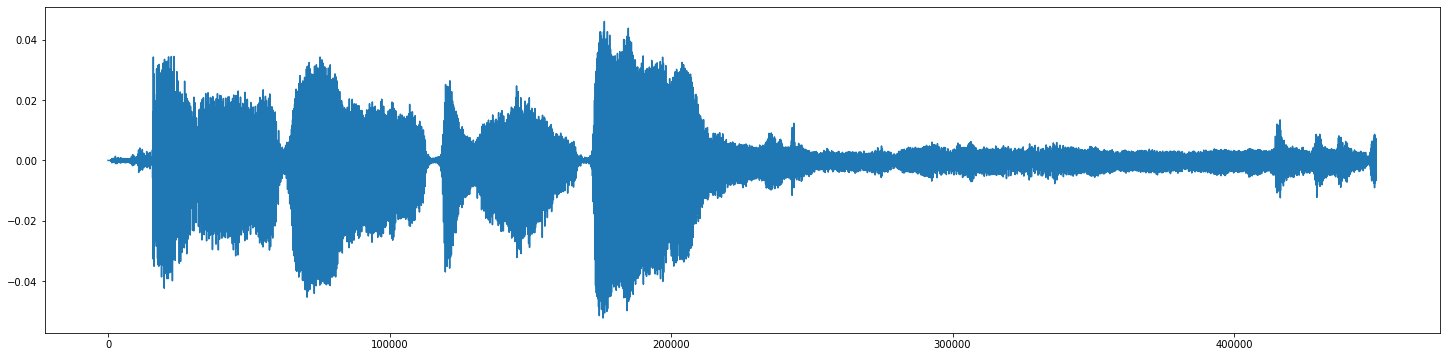

In [78]:
plt.figure(figsize = (25, 6))
plt.plot(audio)

In [79]:
#    'SpectralAcf',
#    'SpectralHps',
#    'TimeAcf',
#    'TimeAmdf',
#    'TimeAuditory',
#    'TimeZeroCrossings'

In [80]:
# %%timeit
f0, t = computePitch('SpectralHps', audio, sr, afWindow=None, iBlockLength=2048, iHopLength=1024)

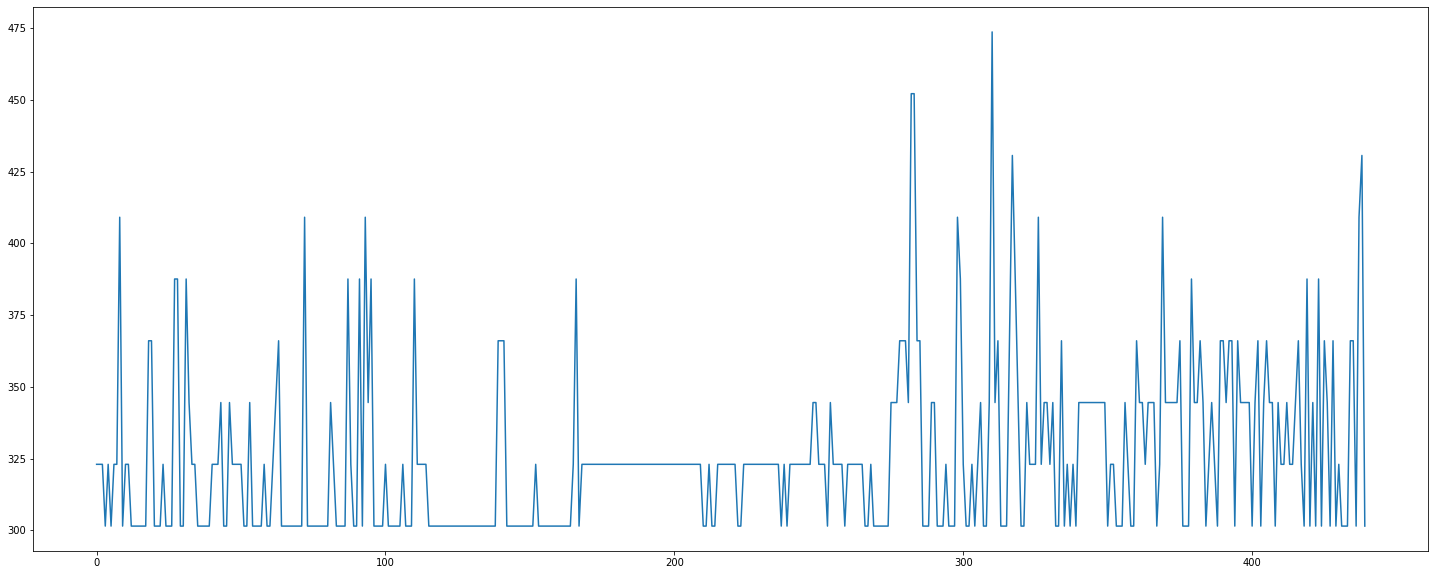

In [81]:
plt.figure(figsize = (25, 10))
plt.plot(f0)

## Evaluate live pitch detection

In [82]:
f0_test = np.loadtxt('f0.txt', dtype='float')

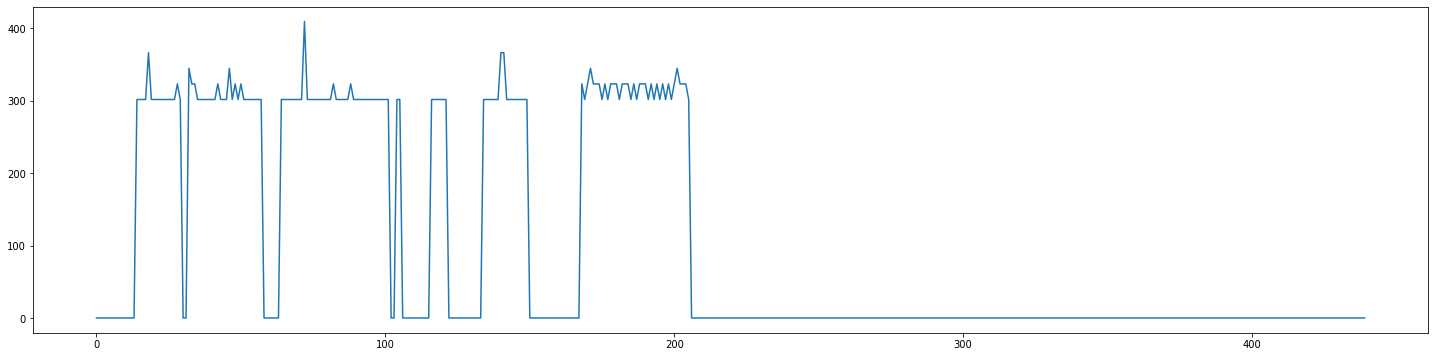

In [83]:
plt.figure(figsize = (25, 6))
plt.plot(f0_test)

## Pitch wrapper function

In [86]:
# A function that wraps around the frequency in a given range to remove octave errors
def f0_scaled(f0, fmin, fmax):
    if f0 == 0:
        f_wrapped = f0
    elif f0 >= fmin and f0 <= fmax:
        f_wrapped = f0
    elif f0 > 0 and f0 < fmin:
        # add relevant f0
        f0_wrapped = f0
    elif f0 > fmax:
        # add relevant f0
        f0_wrapped = f0
    return f0_wrapped

def wrapped_f0(f0, fmin, fmax):
    # f0: array or current frame.
    if len(f0) == 1:
        f0_wrapped = f0_scaled(f0, fmin, fmax)
    
    else:
        f0_wrapped = np.array([])
        for f in f0:
            f0_wrapped = np.append(f0_wrapped, f0_scaled(f, fmin, fmax))
            
    return f0_wrapped